In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

# 测试gpu是否可用
print(tf.test.is_gpu_available())
print(tf.__version__)
print(sys.version_info)

for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)

True
2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()

In [7]:
x_train_all.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train_all.shape

(60000,)

In [10]:
# 取前5000个位验证集，后55000个为训练集
x_valid,x_train =  x_train_all[:5000],x_train_all[5000:]
y_valid,y_train =  y_train_all[:5000],y_train_all[5000:]

In [11]:
# 显示单张图片
def show_single_image(img_arr):
    plt.imshow(img_arr,cmap="binary")
    plt.show()

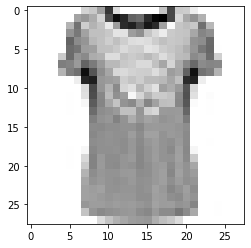

In [12]:
show_single_image(x_train[1])

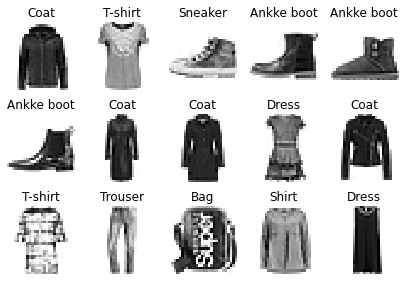

In [13]:

# 显示多张
def show_imgs(n_rows, n_cols,x_data,y_data,class_names):
    assert len(x_data) == len(y_data)
    assert n_rows* n_cols < len(x_data)
    plt.figure(figsize=(n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row +col
            plt.subplot(n_rows,n_cols,index+1)
            plt.imshow(x_data[index],cmap="binary",interpolation="nearest")
            plt.axis("off")
            plt.title(class_names[y_data[index]])
    plt.show()
    
class_names = ["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankke boot"]

show_imgs(3,5,x_train,y_train,class_names)

In [31]:

# 顺序模型 Sequential 模型结构： 层（layers）的线性堆栈。简单来说，它是一个简单的线性结构，没有多余分支，是多个网络层的堆叠
# tf.keras.models.Sequential()
"""
model =keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))
# 第一个全连接层， activation激活函数
model.add(keras.layers.Dense(300,activation='relu'))

# 第二个全连接层， activation激活函数
model.add(keras.layers.Dense(100,activation='relu'))

# 输出层， activation激活函数：softmax
model.add(keras.layers.Dense(10,activation="softmax"))
"""

# relu: y = max(0, x)
# softmax:将向量变成概率分布,x=[x1,x2,x3]
#  y = [e^x1/sum,e^x2/sum,e^x3/sum],sum = e^x1 + e^x2 + e^x3

model =keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation="softmax")
    
])


#  计算交叉熵损失
# reasone for sparse: y是一个单纯的数字(index),要变成one_hot编码
# 如果y已经是一个向量了就用categorical_crossentropy
# loss：损失函数 交叉熵损失
# optmizer：优化器 sgd 越来越小
# metrics:验证指标
model.compile(loss="sparse_categorical_crossentropy",optmizer = "sgd",metrics=["accuracy"])



<module 'tensorflow_core.keras.optimizers' from 'd:\\anaconda3\\envs\\tf2\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\optimizers\\__init__.py'>

In [32]:
# 查看层数
model.layers

In [33]:
# 模型概况
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [18]:
#  235500  数字怎么来的? (None, 784)*W +b -->(None, 300) w.shape:[784,300], b=[300]  784*300+300= 235500

In [34]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 7s 126us/sample - loss: 3.4258 - accuracy: 0.6559 - val_loss: 0.9763 - val_accuracy: 0.7228
Epoch 2/10
55000/55000 [==============================] - 6s 115us/sample - loss: 0.9956 - accuracy: 0.7053 - val_loss: 0.8074 - val_accuracy: 0.7524
Epoch 3/10
55000/55000 [==============================] - 6s 116us/sample - loss: 1.0270 - accuracy: 0.7175 - val_loss: 1.0382 - val_accuracy: 0.7096
Epoch 4/10
55000/55000 [==============================] - 7s 122us/sample - loss: 1.0449 - accuracy: 0.7205 - val_loss: 1.0870 - val_accuracy: 0.6942
Epoch 5/10
55000/55000 [==============================] - 7s 128us/sample - loss: 1.0560 - accuracy: 0.7162 - val_loss: 0.9980 - val_accuracy: 0.6502
Epoch 6/10
55000/55000 [==============================] - 7s 126us/sample - loss: 1.1740 - accuracy: 0.7144 - val_loss: 1.1663 - val_accuracy: 0.7140
Epoch 7/10
55000/55000 [===========================

In [27]:
history.history

{'loss': [1.596861363844438,
  1.4758957224065608,
  1.662592235062339,
  1.5435266005429356,
  1.711766043142839,
  1.529303941414573,
  1.6083721395752646,
  1.5586583216580479,
  1.7104128394386986,
  1.6270278061780064],
 'accuracy': [0.5274364,
  0.5258545,
  0.5335636,
  0.5299818,
  0.5251455,
  0.5203636,
  0.5198909,
  0.5212182,
  0.5191636,
  0.5184],
 'val_loss': [3.543206091880798,
  6.120811177062988,
  4.303847098350525,
  3.814739029121399,
  3.877505715751648,
  3.013303527069092,
  3.9696505554199217,
  4.777073208236694,
  3.7405218267440796,
  4.034270497131348],
 'val_accuracy': [0.5512,
  0.5514,
  0.5424,
  0.5542,
  0.5112,
  0.4988,
  0.5208,
  0.503,
  0.5282,
  0.4934]}

In [22]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

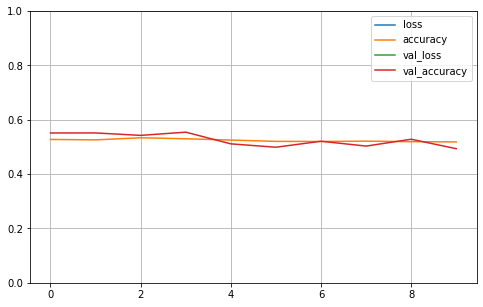

In [28]:
plot_learning_curves(history)